# 📊 CodeAlpha Internship – Task 3: Data Visualization
**Dataset:** Superstore Sales Data  
**Intern:** Yash Mishra

This notebook focuses on creating impactful visualizations to reveal business insights from the Superstore dataset.  
We will explore sales, profit, and discounts across categories, regions, and time.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (10)\Sample - Superstore.csv", encoding="latin1")  # adjust encoding if needed
df.sample(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4945,4946,CA-2016-151372,9/5/2016,9/6/2016,First Class,JH-15985,Joseph Holt,Consumer,United States,Redondo Beach,...,90278,West,OFF-BI-10000050,Office Supplies,Binders,"Angle-D Binders with Locking Rings, Label Holders",11.680,2,0.2,3.9420
5286,5287,CA-2017-105991,5/5/2017,5/6/2017,First Class,LH-17020,Lisa Hazard,Consumer,United States,Louisville,...,80027,West,OFF-BI-10003274,Office Supplies,Binders,"Avery Durable Slant Ring Binders, No Labels",9.552,8,0.7,-7.3232
7059,7060,CA-2016-165330,12/11/2016,12/11/2016,Same Day,WB-21850,William Brown,Consumer,United States,Anaheim,...,92804,West,OFF-AP-10001469,Office Supplies,Appliances,Fellowes 8 Outlet Superior Workstation Surge P...,83.420,2,0.0,24.1918
2906,2907,CA-2017-121615,11/3/2017,11/9/2017,Standard Class,DL-12925,Daniel Lacy,Consumer,United States,Eagan,...,55122,Central,OFF-PA-10000327,Office Supplies,Paper,Xerox 1971,8.560,2,0.0,3.8520


In [11]:

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Sales by Region

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12292\3253922826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_region,x='Region',y='Sales',palette='Blues_d')


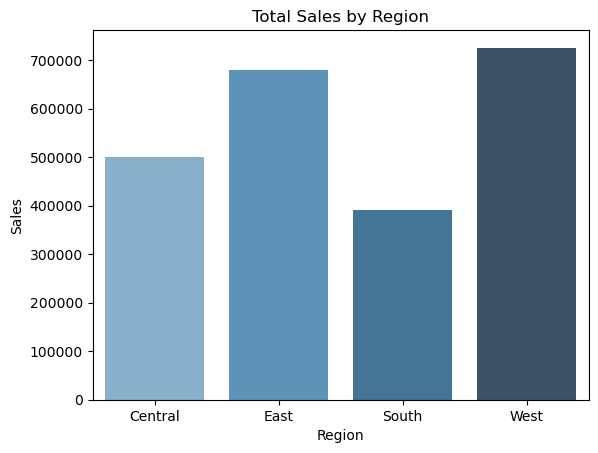

In [23]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
sns.barplot(data=sales_by_region,x='Region',y='Sales',palette='Blues_d')
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.show()

# Profit vs Sales by Category

Text(0, 0.5, 'Profit')

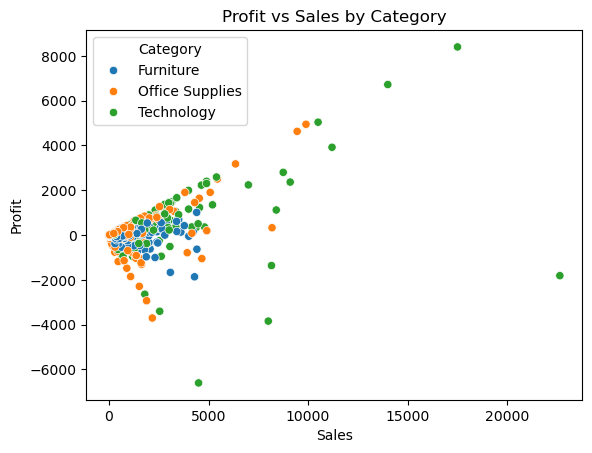

In [32]:
sns.scatterplot(data=df,x='Sales',y='Profit',hue='Category')
plt.title('Profit vs Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Top 10 Sub-Categories by Sales

Text(0, 0.5, 'Sub-Category')

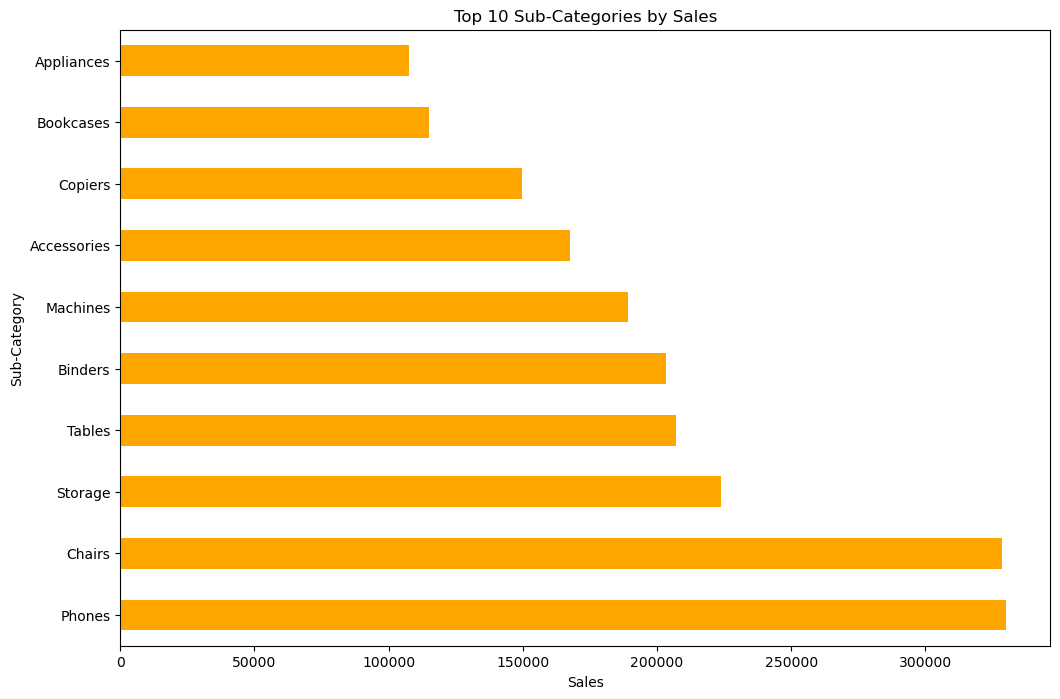

In [52]:
top_sub_cat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
top_sub_cat.plot(kind='barh',figsize=(12,8),color='orange')
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Sales")
plt.ylabel("Sub-Category")

# Monthly Sales Trend

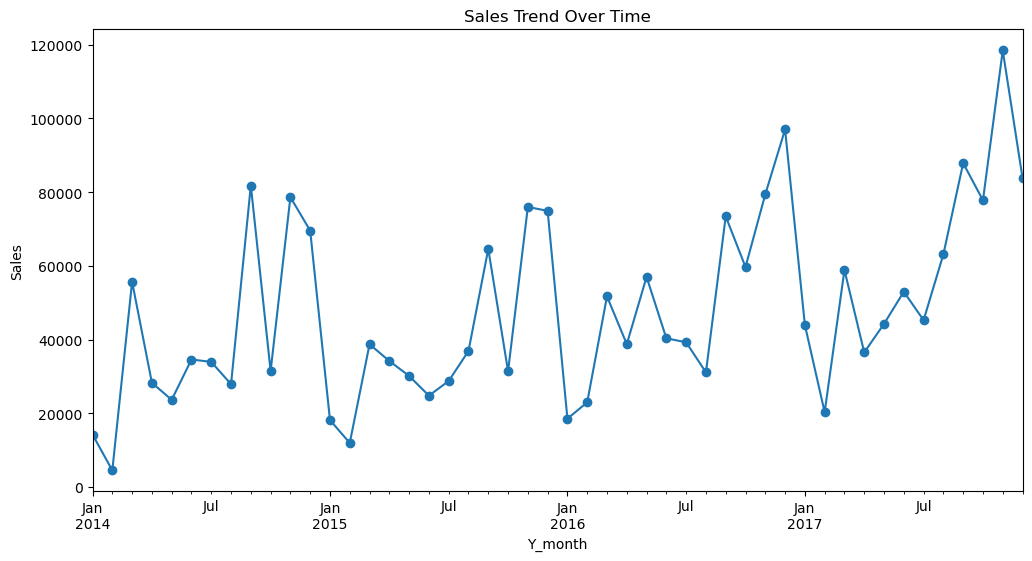

In [59]:
df['Y_month'] = df['Order Date'].dt.to_period('M')
sales_trend = df.groupby('Y_month')['Sales'].sum()
sales_trend.plot(kind='line',figsize=(12,6),marker='o')
plt.title('Sales Trend Over Time')
plt.ylabel('Sales')
plt.show()

# Profit Heatmap (Region × Category)

In [66]:
pivot = df.pivot_table(index='Region',columns='Category',values='Profit',aggfunc='sum')

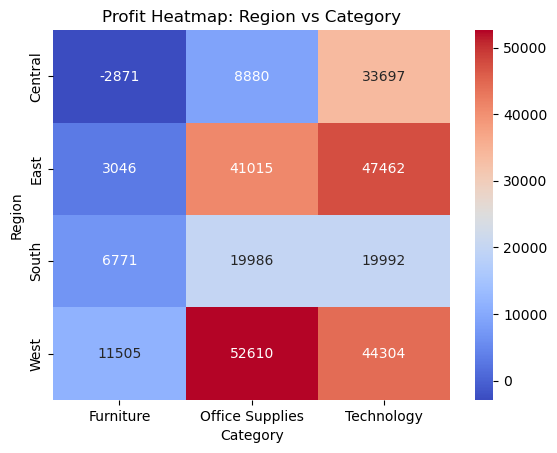

In [74]:
sns.heatmap(pivot, annot=True,fmt=".0f",cmap="coolwarm")
plt.title("Profit Heatmap: Region vs Category")
plt.show()

# Discount Impact on Profit

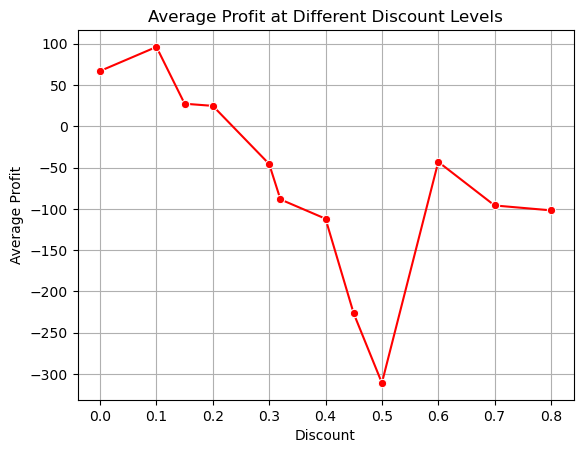

In [83]:
discount_profit = df.groupby("Discount")["Profit"].mean().reset_index()

sns.lineplot(data=discount_profit, x="Discount", y="Profit", marker="o", color="red")
plt.title("Average Profit at Different Discount Levels")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.grid(True)
plt.show()


#  -->Key Insights<--

1. **Sales by Region:** The West region generates the highest sales, while the South lags behind.  
2. **Profit vs Sales by Category:** Technology products often yield high profit, whereas Furniture can result in losses despite high sales.  
3. **Top Sub-Categories:** Phones and Chairs are among the top-selling sub-categories.  
4. **Sales Trend:** Sales peak around November–December, showing seasonality during holiday seasons.  
5. **Profit Heatmap:** Central region performs poorly in Furniture, while West excels in Technology.  
6. **Discounts vs Profit:** Higher discounts (>20%) consistently reduce profitability, proving discounts are **hurting profits** overall.  

---

**This notebook delivers a clear **data story** using visualization.  
**GitHub Repository: `CodeAlpha_DataViz_Superstore`
